# <center>Cardio Good Fitness - EDA Project </center>

**Objective** - Preliminary Data Analysis. Explore the dataset and extract basic observations about the data. The idea is to get comfortable working in Python and with EDA techniques.

You are expected to do the following :

* Come up with a customer profile (characteristics of a customer) of the different products
* Perform univariate and multivariate analyses
* Generate a set of insights and recommendations that will help the company in targeting new customers

**Context** - The data is about customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables-

1. Product - The model no. of the treadmill
2. Age -  Age of the customer in no of years
3. Gender - Gender of the customer
4. Education - Education of the customer in no. of years
5. Marital Status - Marital status of the customer
6. Usage - Avg. # times the customer wants to use the treadmill every week
7. Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
8. Income - Income of the customer
9. Miles- Miles that a customer expects to run

Explore the dataset to identify differences between the customers of each product. You can also explore relationships between the different attributes of the customers. You can approach it from any other line of questioning that you feel could be relevant for the business.

## Importing all necessary libraries

In [1]:
#import all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pf
sns.set(color_codes=True)
%matplotlib inline 
import warnings

## Loading the dataset

In [2]:
#loading the dataset
data = pd.read_csv('./dataset/CardioGoodFitness.csv')

# Data Profile:

We will take a quick look at the dataset and will try to create a data profile by analysing the following

* Total records and data types avalable in the dataset
* Data Quality, look for NaNs or null values
* Data Summary, analyse central tendency information of numerical data points available
* Detailed Data Summary of the dataset
* Correlation information of avaiable numerical data points in the dataset
* Generate a summry report using Pandas Profiling API


## Copying the data for backup

In [3]:
#copying the data as backup
data_copy = data

## Quick sneak peak at the dataset

In [4]:
#quick sneak peak at the dataset
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


## Looking at the dataset shape

In [5]:
#look at the dataset size, avaiable datapoints
data.shape

(180, 9)

## Dataype Summary

In [6]:
#data type summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
Product          180 non-null object
Age              180 non-null int64
Gender           180 non-null object
Education        180 non-null int64
MaritalStatus    180 non-null object
Usage            180 non-null int64
Fitness          180 non-null int64
Income           180 non-null int64
Miles            180 non-null int64
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


## Data Summary, analyse numerical datapoints

In [7]:
#Data Summary, analyse central tendency information of numerical data available
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


## Detailed Data Summary

In [8]:
#detailed summery including all columns
data.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


## Looking for Missing or Null Values

In [9]:
#total missing values in the dataset
data.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [10]:
#total null values in the dataset
data.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

## Correlation information of numerical datapoints

In [11]:
#correlation information of numerical datapoints
data.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


## Data Profile Summary:

* The dataset is clean. It doesn't have any missing or null values
* The dataset has **180** rows and **9** columns
* There are **6** integer and **3** string columns
* Customer age avaiable in the dataset range from **18 to 50 yrs**
* Average age of the customers is **28.78**
* There are three model of Treadmill sold to customers, TM195, TM498 and TM798 
* Most purchased product is **TM195**
* On an average customers use treadmill **~3 times a week**
* Most of the customers in the dataset are **male** and they are all **partnered**



### Pandas Profiling Report

In [12]:
#Data summary profile report using Pandas Profiling API.
profile_rpt=pf.ProfileReport(data);
profile_rpt

# Univariate Analysis

Let's analyse the features avaiable in the dataset for a closer look 

#### Numerical Columns
* Age
* Education
* Usage
* Fitness
* Income
* Miles

#### Categorical Columns
* Product
* Gender
* MaritalStatus

## Analysing Categorical Datapoints

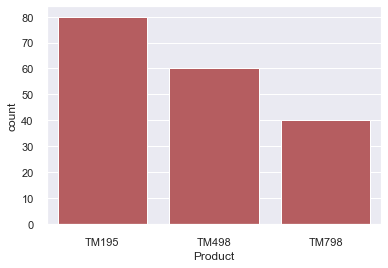

In [13]:
#Get number of treadmills purchased by product model
sns.countplot(data['Product'], color='r');

In [14]:
data['Product'].value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

In [15]:
data['Product'].value_counts()/len(data)*100

TM195    44.444444
TM498    33.333333
TM798    22.222222
Name: Product, dtype: float64

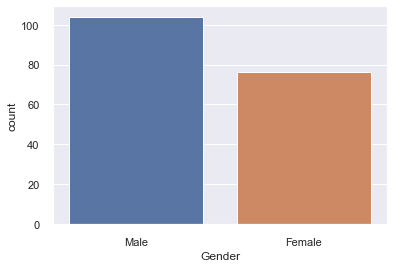

In [16]:
#Get number of male and female customers in the dataset
sns.countplot(data['Gender']);

In [17]:
data['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [18]:
data['Gender'].value_counts()/len(data)*100

Male      57.777778
Female    42.222222
Name: Gender, dtype: float64

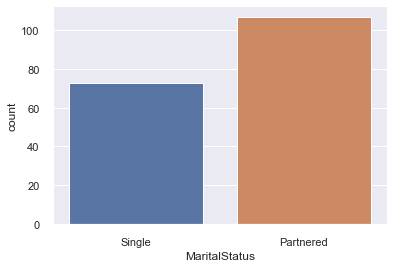

In [19]:
#Get a number of male and female customers in the dataset by MaritalStatus
sns.countplot(data['MaritalStatus']);

In [20]:
data['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [21]:
data['MaritalStatus'].value_counts()/len(data)*100

Partnered    59.444444
Single       40.555556
Name: MaritalStatus, dtype: float64

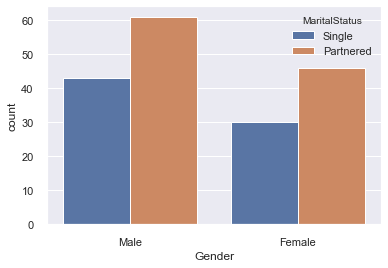

In [22]:
sns.countplot(data['Gender'], hue=data['MaritalStatus']);

## Analysing Numerical Datapoints

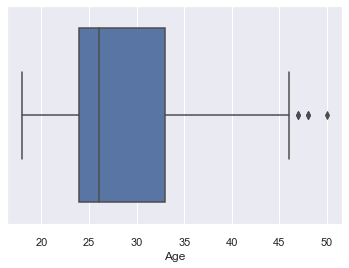

In [23]:
#Generating Box Plot for Age to check the spread and for outliers
sns.boxplot(data['Age']);

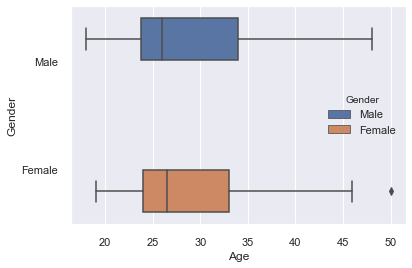

In [24]:
#Generating Box Plot for Age and see the spread by Gender
sns.boxplot(data['Age'], data['Gender'], hue=data['Gender']);

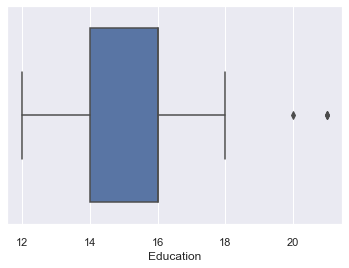

In [25]:
#Generating Box Plot for Education to check the spread and for outliers
sns.boxplot(data['Education']);

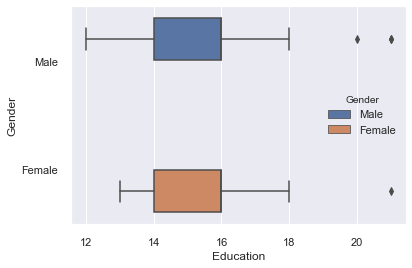

In [26]:
sns.boxplot(data['Education'], data['Gender'], hue=data['Gender']);

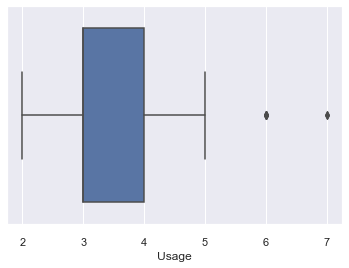

In [27]:
#Generating Box Plot for Usage to check the spread and for outliers
sns.boxplot(data['Usage']);

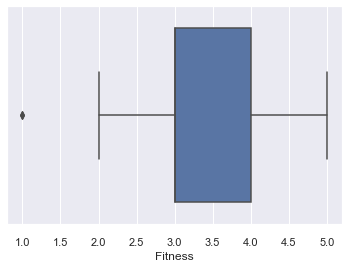

In [28]:
#Generating Box Plot for Usage to check the spread and for outliers
sns.boxplot(data['Fitness']);

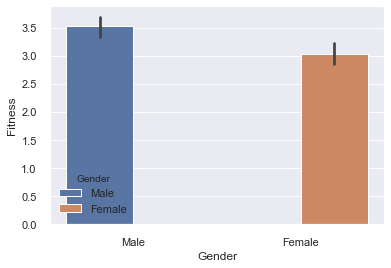

In [29]:
sns.barplot(data['Gender'], data['Fitness'], hue=data['Gender']);

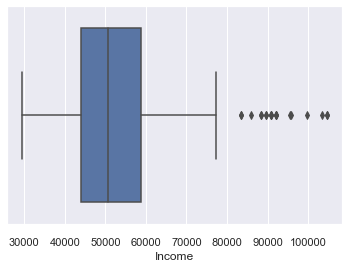

In [30]:
#Generating Box Plot for Usage to check the spread and for outliers
sns.boxplot(data['Income']);

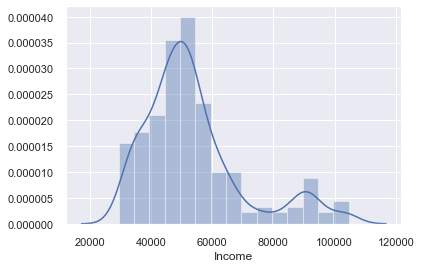

In [31]:
#histogram to check the distribution
sns.distplot(data['Income']);

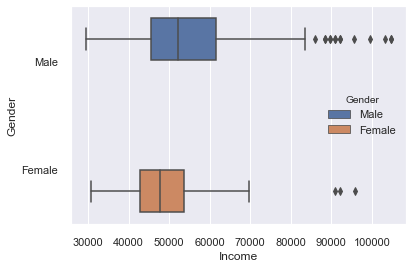

In [32]:
sns.boxplot(data['Income'], data['Gender'], hue=data['Gender'] );

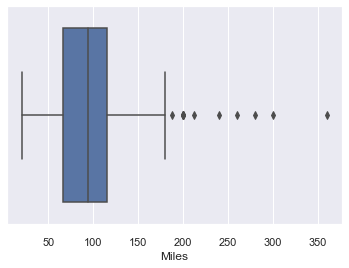

In [33]:
#Generating Box Plot for Usage to check the spread and for outliers
sns.boxplot(data['Miles']);

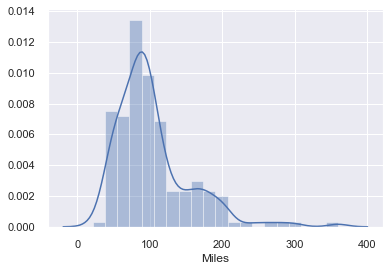

In [34]:
#histogram to check the distribution
sns.distplot(data['Miles']);

## Univariate Analysis Summary

* **TM195** is the most purchased product, **~44%** of cutomers bought that particular model, followed by **TM498(33%)** and by **TM798(22%)** 
*  **~58%** of the customers are male and **42%** are female out of which **~60%** are partnered and **40%** are single
* Most of the numerical datapoints are clean
* **Miles** datapoint is right skewed and has some outliers. It could be due to a small percentgae of customers who coule be power runners
* **Income** datapoint is right skewed and has some outliers, we could also observe some difference in income spread between male and female customers

# Multivariate Analysis

Let's take a look at the features for any potential corelation or relation between them to understand datapoints further

### Analyse datapoints for potential relations 

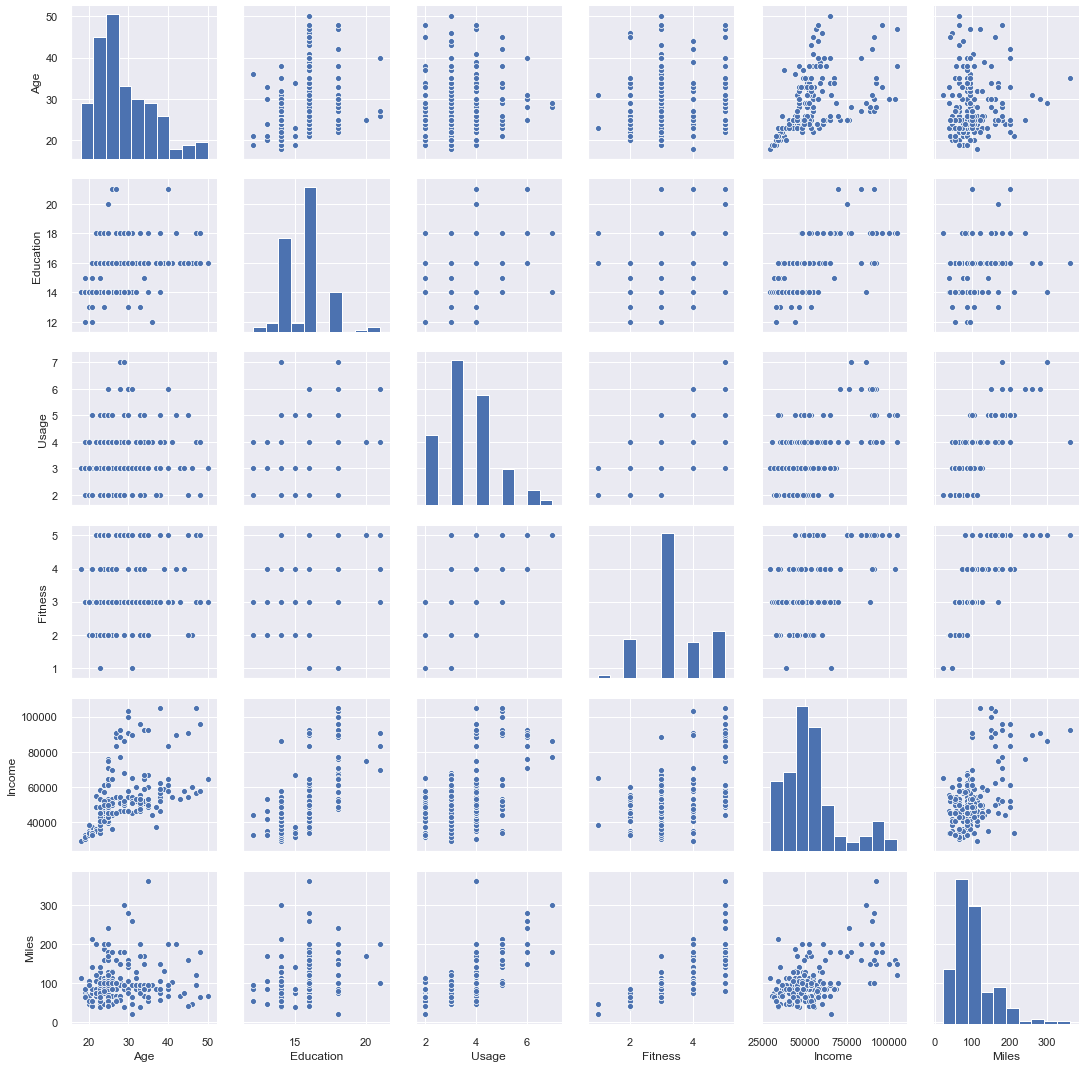

In [35]:
#generate pairplots to understand and identify if there are any relations between datapoints
sns.pairplot(data);

In [36]:
#generating correlation info
data.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


### Generating Heatmap to vizualize correllation

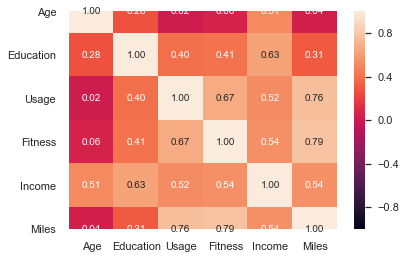

In [37]:
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f");

### Correlation Age Vs Income

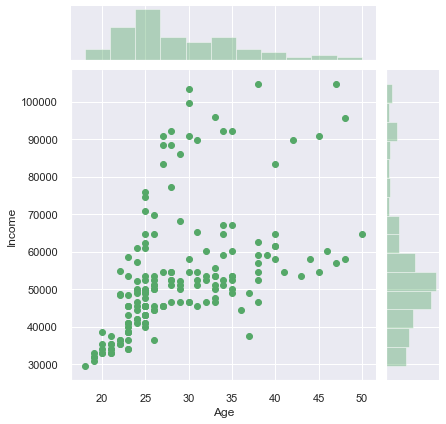

In [38]:
sns.jointplot(data['Age'], data['Income'], kind='scatter',color='g');

### Correlation Age Vs Miles

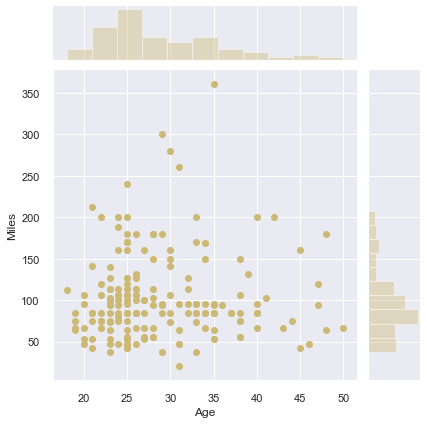

In [39]:
sns.jointplot(data['Age'], data['Miles'], kind='scatter',color='y');

## Multivariate Analysis Summary
* The given dataset is clean
* We observed correlations between all the columns in the data
* We were able to observe few correlations between Age and Income and Age and Miles 


# Analysing Data for Key Insights

### Adding a new Feature, Age_Group for Grouping Customers by Age

In [40]:
data['Age_Group'] = pd.cut(data['Age'],
    bins = [0,20,30,40,50,60], labels=['18-20','20-30','30-40','40-50','60 >' ],)
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Group
0,TM195,18,Male,14,Single,3,4,29562,112,18-20
1,TM195,19,Male,15,Single,2,3,31836,75,18-20
2,TM195,19,Female,14,Partnered,4,3,30699,66,18-20
3,TM195,19,Male,12,Single,3,3,32973,85,18-20
4,TM195,20,Male,13,Partnered,4,2,35247,47,18-20


### Adding a new Feature, Income_Group for Grouping Customers by Income

In [41]:
data['Income_Group'] = pd.cut(data['Income'],
    bins = [0,20000,40000,60000,80000,100000], labels=['<=20K','20-40K','40-60K','60-80K','80-100K'],)
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Group,Income_Group
0,TM195,18,Male,14,Single,3,4,29562,112,18-20,20-40K
1,TM195,19,Male,15,Single,2,3,31836,75,18-20,20-40K
2,TM195,19,Female,14,Partnered,4,3,30699,66,18-20,20-40K
3,TM195,19,Male,12,Single,3,3,32973,85,18-20,20-40K
4,TM195,20,Male,13,Partnered,4,2,35247,47,18-20,20-40K


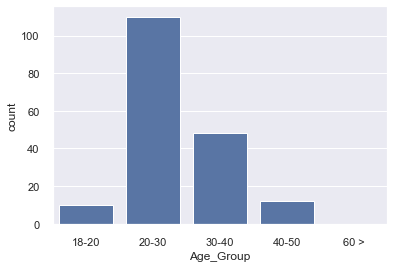

In [42]:
#Getting count on the Age_Group
sns.countplot(data['Age_Group'], color='b');

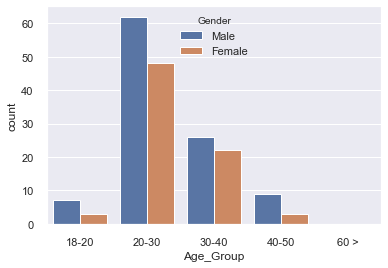

In [43]:
#Undersatnd the distribution of Gender in different Age_Groups
sns.countplot(data['Age_Group'], hue=data['Gender']);

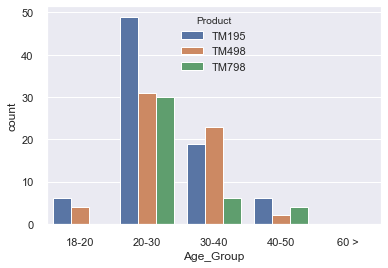

In [44]:
#Product usgae by Age_Group
sns.countplot(data['Age_Group'], hue=data['Product']);

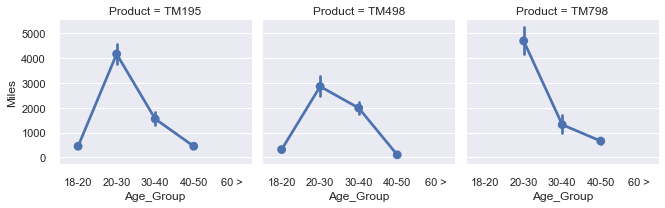

In [45]:
#Total Miles used by Age_Group by each Product
sns.catplot(x='Age_Group', y='Miles', data=data,
                estimator=sum, col='Product', kind="point",
                height=3,col_wrap = 5)

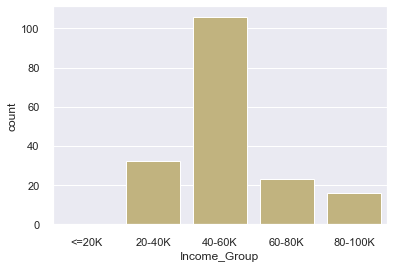

In [46]:
#Income Group Distribution
sns.countplot(data['Income_Group'], color='y');

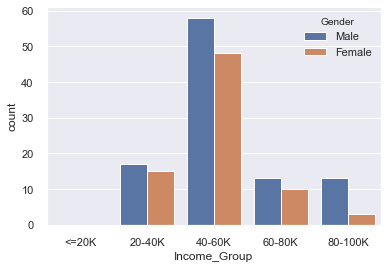

In [47]:
#Income Group by Gender
sns.countplot(data['Income_Group'], hue=data['Gender']);

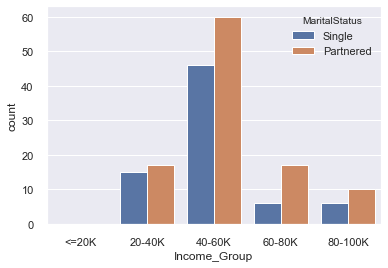

In [48]:
#Income group by marital status
sns.countplot(data['Income_Group'], hue=data['MaritalStatus']);

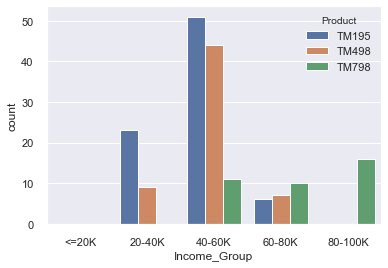

In [49]:
#Income group by product usage
sns.countplot(data['Income_Group'], hue=data['Product']);

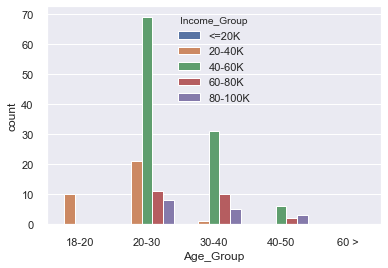

In [50]:
#age group vs income group
sns.countplot(data['Age_Group'], hue=data['Income_Group']);

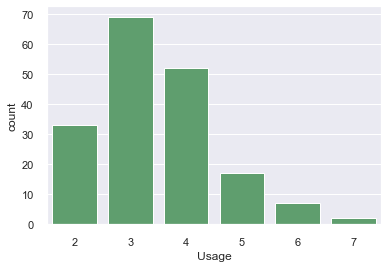

In [51]:
#Usage distribution
sns.countplot(data['Usage'], color='g');

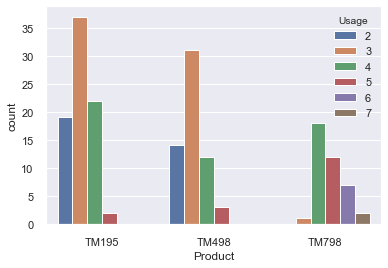

In [52]:
#Distribution of Usage by Product
sns.countplot(data['Product'], hue=data['Usage']);

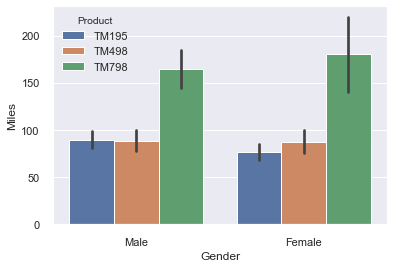

In [53]:
#Gender vs Miles distibution
sns.barplot(data['Gender'], data['Miles'], hue=data['Product']);

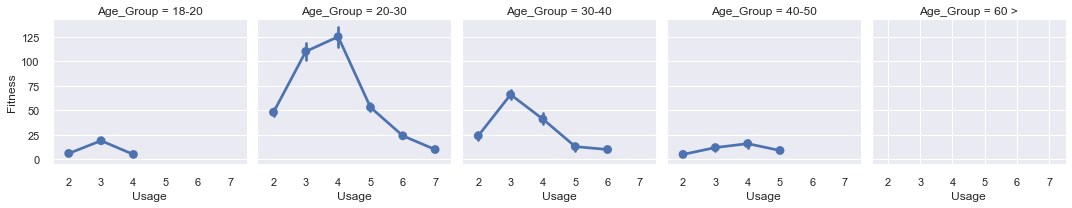

In [54]:
#Usage behaviour among Age Group by Fitness ratings
sns.catplot(x='Usage', y='Fitness', data=data,
                estimator=sum, col='Age_Group', kind="point",
                height=3,col_wrap = 5);

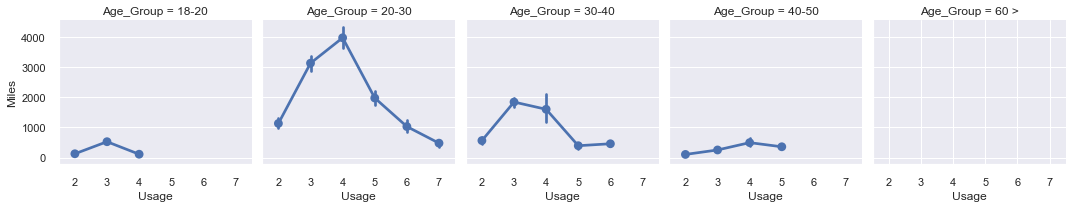

In [55]:
#Usage behaviour among Age Group by Miles
sns.catplot(x='Usage', y='Miles', data=data,
                estimator=sum, col='Age_Group', kind="point",
                height=3,col_wrap = 5);

# Key Observations

* The most common **age group** of the customers in the dataset are between **20 to 30 Yrs**
* Most of the customers who **buy/use** all three treadmill models belong to the **same age group (20-30)** 
* We can also comfim the observation by the total miles used by the same customer base
* **income** of most of the customers in the dataset lie between **40k to 60K**
* Customers who bought most of treadmill models **TM195 & TM498** belong to income bracket **[40k-60K]**
* Within the same income bracket the male customers seems to have higher income than female customers
* Customers in age group **20 to 30 Yrs** are predominantly in the income bracket **[40k-60K]** 
* On an average cusotmers use the treadmill around **~3 to 4 times a week**
* Same customers tend to **prefer models TM195 and TM498**, we can confim the same usage pattern
* Least owned treadmill model is **TM798**
* Customers who prefer **model TM798** tends to use it more frequently around **~5 to 7 times a week**
* Customers who bought **TM798** belong to age group **30+** & fall under highr income bracket **[> 60k]**
* **Model TM798** could be more durable, as avergae miles used on the model is higher than other two models
* **Model TM798** could be higher in price, as customer base for it fall under higher income bracket

# Summary
* The cusotmer base for Cardio Good Fitness is of age **20 to 30 Yrs** with an income bracket of **[40k-60K]**


# Recommendations
* Cardio Good Fitness can focus on building new products to increase customer base in **20 to 30 Yrs** with an income bracket of **[40k-60K]**
* Cardio Good Fitness can experiment on a hybrid model to convert customers using durable models as they lean towards durability 
* Cardio Good Fitness can experiment on pricing for **TM798** to attract **TM195 & TM498** customers 